In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("tested.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df['Upd_Age']=df['Age'].fillna(df['Age'].mean())

In [5]:
df.drop('Age',axis=1,inplace=True)

In [6]:
df['Upd_Fare']=df['Fare'].fillna(df['Fare'].median())

In [7]:
df.drop('Fare',axis=1,inplace=True)

In [8]:
df.drop('Cabin',axis=1,inplace=True)

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
Upd_Age        0
Upd_Fare       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Embarked     418 non-null    object 
 9   Upd_Age      418 non-null    float64
 10  Upd_Fare     418 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [11]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [12]:
df['Embarked']=df['Embarked'].map({'Q':1,'S':2,'C':3})
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Upd_Age,Upd_Fare
0,892,0,3,"Kelly, Mr. James",0,0,0,330911,1,34.5,7.8292
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,1,0,363272,2,47.0,7.0000
2,894,0,2,"Myles, Mr. Thomas Francis",0,0,0,240276,1,62.0,9.6875
3,895,0,3,"Wirz, Mr. Albert",0,0,0,315154,2,27.0,8.6625
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,3101298,2,22.0,12.2875


In [14]:
feature_cols=['Sex','Parch','SibSp','Upd_Age','Upd_Fare','Pclass','Embarked']
X=df[feature_cols]
y=df['Survived']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=16)

In [16]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=16)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [17]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix


array([[74,  0],
       [ 0, 31]])

Text(0.5, 427.9555555555555, 'Predicted label')

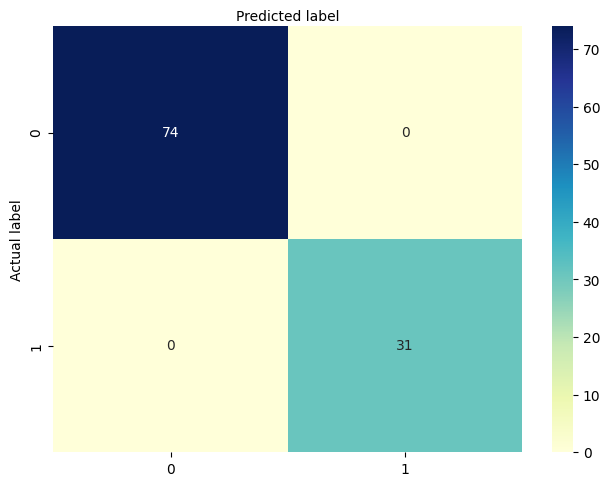

In [22]:
class_names=[0,1] #names of classes
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [24]:
from sklearn.metrics import classification_report
target_names=['survived','not survived']
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

    survived       1.00      1.00      1.00        74
not survived       1.00      1.00      1.00        31

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



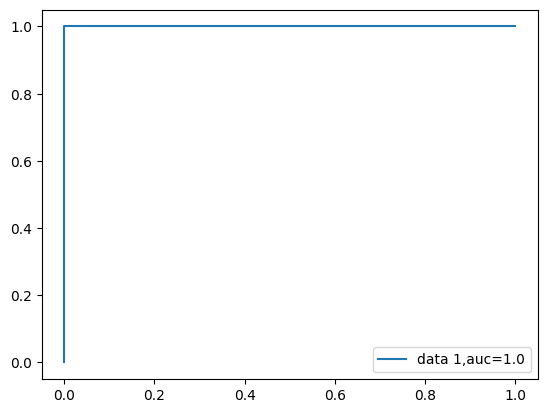

In [25]:
y_pred_proba=logreg.predict_proba(X_test,)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1,auc="+str(auc))
plt.legend(loc=4)
plt.show()